# Kernel SVM

![](./pic/linear_kernel.png)

![](./pic/non_linear_kernel.png)

![](./pic/radial_kernel.png)

## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Social_Network_Ads.csv | head

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0


In [2]:
%cat ../00_data/Social_Network_Ads.csv | tail

48,33000,1
47,23000,1
45,45000,1
60,42000,1
39,59000,0
46,41000,1
51,23000,1
50,20000,1
36,33000,0
49,36000,1

## Goal

Create a classification model to predict which customer would buy a new SUV.

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
df = pd.read_csv('../00_data/Social_Network_ads.csv', decimal='.', sep=',')

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.shape

(400, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
np.sum(df.isna(), axis=0)

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Target Variable and Features

+ Target Variable: `Purchased`
+ Features:
    + `Age`
    + `EstimatedSalary`


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X[:10, :]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Split the training and testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Features scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:5, :]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [14]:
y_train[:5]

array([0, 1, 0, 1, 1])

In [15]:
X_test[:5, :]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

In [16]:
y_test[:5]

array([0, 0, 0, 0, 0])

## Fit and train the model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from matplotlib.colors import ListedColormap

def fit_svm(kernel, X, y, random_state = 0):
    classifier = SVC(kernel=kernel, random_state=random_state)
    return classifier.fit(X, y)

def predict(classifier, X):
    y_pred = classifier.predict(X_test)
    return y_pred

def show_confusion_matrix(classifier, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues,
             colorbar=True)
    plt.title("Confusion Matrix")
    plt.show()

def show_accuracy_score(actual, pred):
    ac = accuracy_score(actual, pred)
    print(f'Accuracy on test set: {ac*100}%')

def show_boundary(classifier, x, y, x_test_set, name):
    X_set, y_set = scaler.inverse_transform(x), y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
    plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(f'SVN ({name}, kernel = {classifier.kernel})')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    

### Linear Kernel

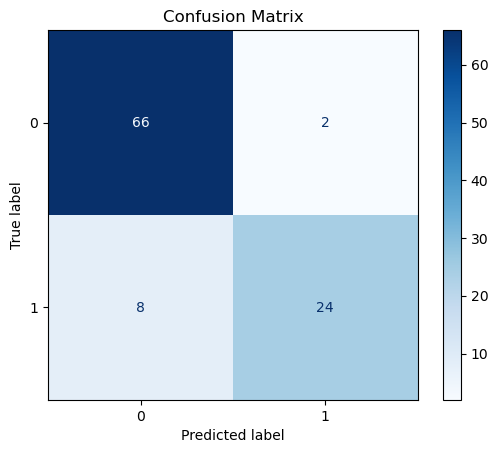

Accuracy on test set: 90.0%


/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


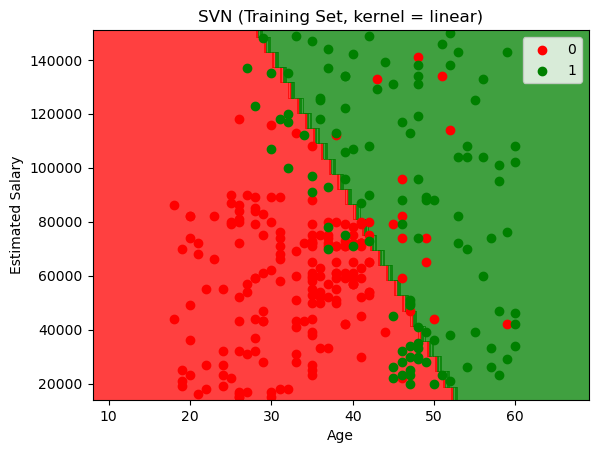

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


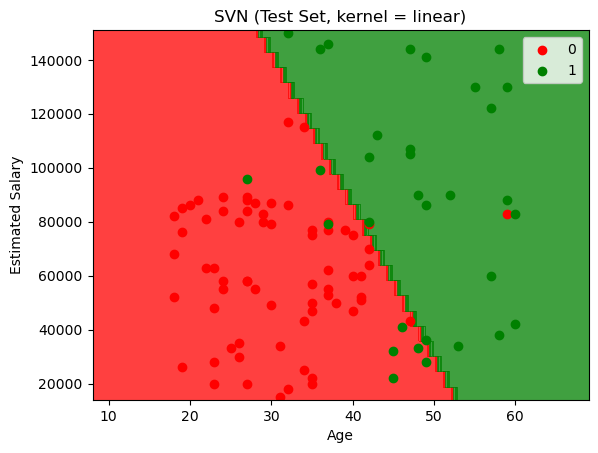

In [18]:
model = fit_svm('linear', X_train, y_train)
y_pred = predict(model, X_test)
show_confusion_matrix(model, y_test, y_pred)
show_accuracy_score(y_test, y_pred)
show_boundary(model, X_train, y_train, X_train, 'Training Set')
show_boundary(model, X_test, y_test, X_test, 'Test Set')

### RBF Kernel

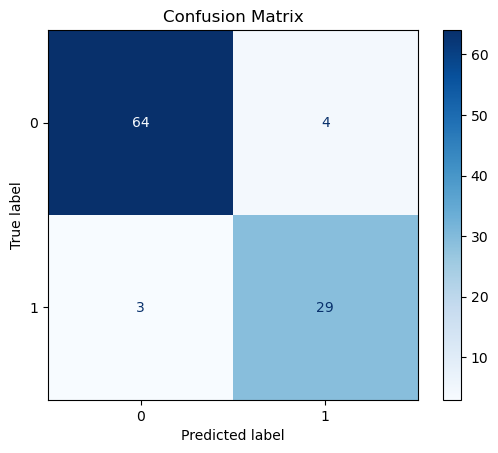

Accuracy on test set: 93.0%


/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


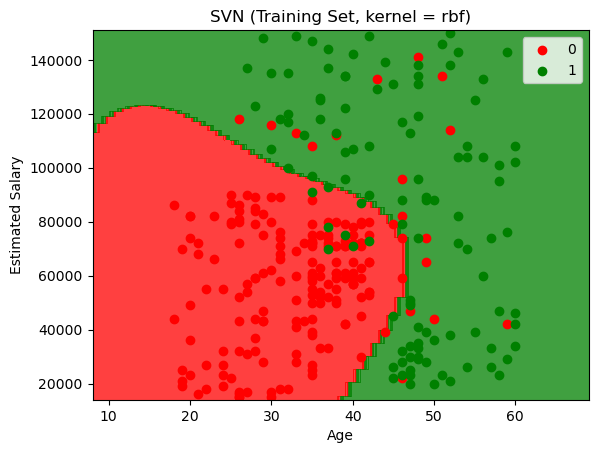

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


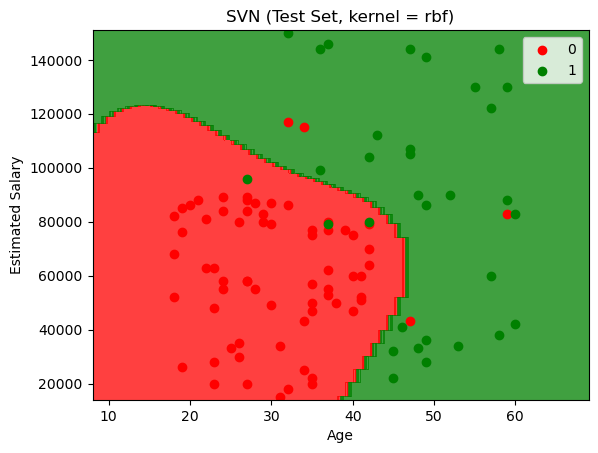

In [19]:
model = fit_svm('rbf', X_train, y_train)
y_pred = predict(model, X_test)
show_confusion_matrix(model, y_test, y_pred)
show_accuracy_score(y_test, y_pred)
show_boundary(model, X_train, y_train, X_train, 'Training Set')
show_boundary(model, X_test, y_test, X_test, 'Test Set')

### Polynomial Kernel

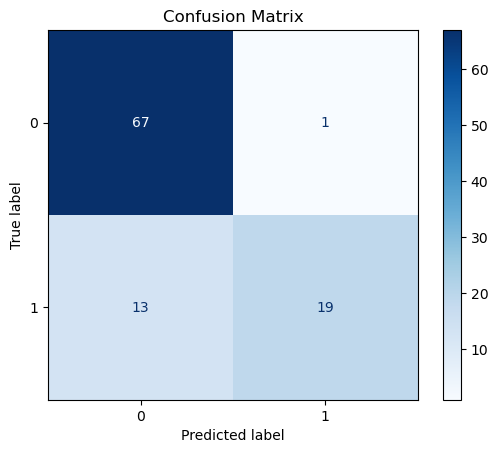

Accuracy on test set: 86.0%


/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


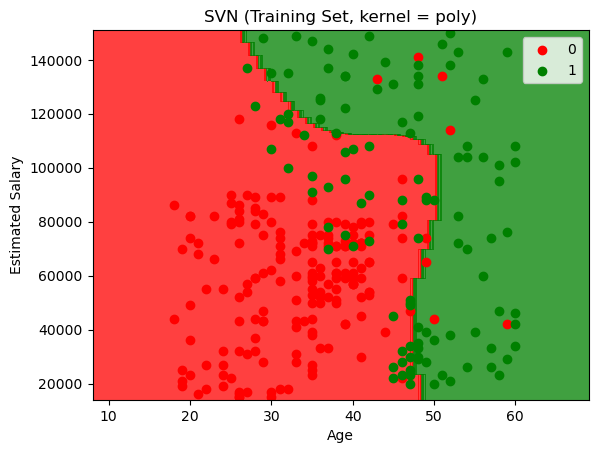

/var/folders/qg/tg87rgq56j3f4ynsm4r5grw80000gn/T/ipykernel_6633/4201073217.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


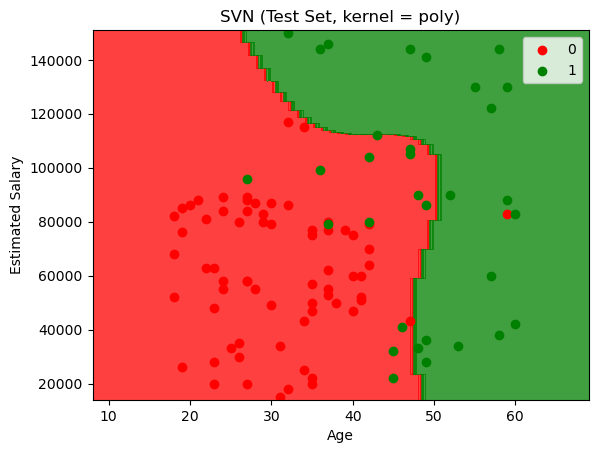

In [20]:
model = fit_svm('poly', X_train, y_train) # default degree = 3
y_pred = predict(model, X_test)
show_confusion_matrix(model, y_test, y_pred)
show_accuracy_score(y_test, y_pred)
show_boundary(model, X_train, y_train, X_train, 'Training Set')
show_boundary(model, X_test, y_test, X_test, 'Test Set')

## Cross Validation and Pipeline

In [21]:
# check class balance
pd.Series(y_train).value_counts(normalize=True) * 100

0    63.0
1    37.0
Name: proportion, dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

pipe = Pipeline(
    steps=[
        # ("scaler", StandardScaler()), 
        ("svc", SVC())
    ]
)

# Tune the params & CV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01],
    'svc__kernel': ['rbf', 'linear', 'poly'],
    'svc__degree': [2, 3, 4],
    'svc__class_weight': [None, 'balanced'],  # Test with and without class weighting\
    'svc__random_state': [0]
}

grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# best params
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {(grid_search.best_score_*100):.2f}%")

# using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)*100}%')


Best Parameters: {'svc__C': 100, 'svc__class_weight': 'balanced', 'svc__degree': 2, 'svc__gamma': 1, 'svc__kernel': 'rbf', 'svc__random_state': 0}
Best Cross-Validation Accuracy: 91.33%
Accuracy on test set: 93.0%
